# Airbnb Data for Seattle - Analysis

We are using CRISP-DM approach to analyse this Airbnb homestays activity data. This approach has follwing steps
1. Business Uderstanding
2. Data Understanding
3. Data Prepareation
4. Modeling
5. Evaluation
6. Deployment

## Business Understanding

Airbnb is a platform where users can list and rent houses/apartments. Users are using this platform in a unique and personalised way while travelling and staying.
This is useful for hosts to list their properties while guests can use this for staying

We have Airbnb Dataset for Seattle,USA. We are analysing this to answer below questions
1. Which time are the most costlies to stay in Seattle?
2. Which neighbourhood is most listed for staying?
3. Which neighbourhood is costly?
4. What are the most listed toom types and what is their average price?
5. Can we predict the price with this available data and which factors are important for deciding the price

Let's understand more about the data in the next steps



# Data Understanding

We have following three files in the dataset
1. listings.csv : Inculdes property listings with ite details like description, price,review score etc.
2. calendar.csv : shows availability of property for a give date with its price
3. review.csv : Reviewer comments about their stays with listing ids.

First Let's import the necessary libraries and import the data into the dataframes

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb

In [156]:
reviews = pd.read_csv('./reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [157]:
calendar = pd.read_csv('./calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [158]:
listings = pd.read_csv('./listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Data Preperation

Lets look at the calender data for monthwise availability and price

In [159]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [160]:
#checking columns with null values 
calendar.isna().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

Here we need to bring data into specific format to work with the same

In [161]:
# Convert the date column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

calendar['available'] = calendar['available'].apply(lambda x:1 if x=='t' else 0)

In [162]:
# Drop null prices
calender_dropna = calendar.dropna(subset=['price'],how='any')


In [163]:
calender_dropna.isna().mean()

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

In [164]:
calender_dropna.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
9,241032,2016-01-13,1,$85.00
10,241032,2016-01-14,1,$85.00
14,241032,2016-01-18,1,$85.00


In [165]:
# convert price from string to numeric
calender_dropna['price'] = calender_dropna['price'].str.replace('$','')
calender_dropna['price'] = calender_dropna['price'].str.replace(',','')
calender_dropna['price'] = pd.to_numeric(calender_dropna['price'])

/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_84992/602515840.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calender_dropna['price'] = calender_dropna['price'].str.replace('$','')
/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_84992/602515840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_dropna['price'] = calender_dropna['price'].str.replace('$','')
/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_84992/602515840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [166]:
calender_dropna.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


In [167]:
# month wise analysis
calendar_grp_date = calender_dropna.groupby(calender_dropna['date'].dt.month).sum().reset_index()
calendar_grp_date.head()

,date,listing_id,available,price
0,1,351244225865,64937,7981548.0
1,2,397147751252,73321,9113355.0
2,3,451919267421,83938,10798161.0
3,4,398739271361,76037,10272371.0
4,5,418598584732,79971,11159008.0


Lets compare Mothwise avg price and monthwise availability using below graphs

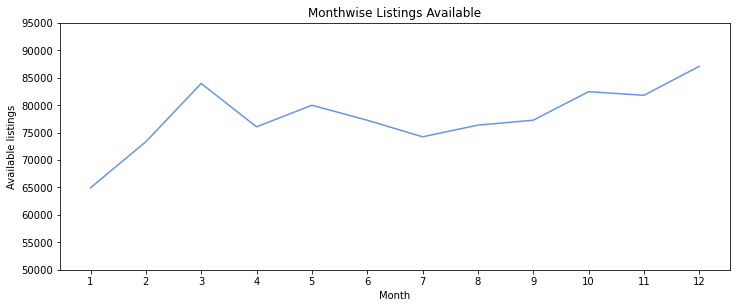

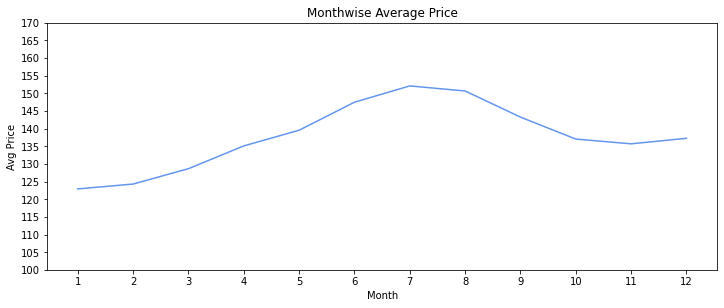

In [168]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sb.lineplot(x='date',y='available',data=calendar_grp_date,color='cornflowerblue')
plt.xticks(np.arange(1, 13, 1.0))
plt.yticks(np.arange(50000, 100000, 5000))
plt.xlabel('Month')
plt.ylabel('Available listings')
plt.title("Monthwise Listings Available")

# plt.show()

plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
sb.lineplot(x='date',y=calendar_grp_date['price']/calendar_grp_date['available'],data=calendar_grp_date,color='cornflowerblue')
plt.xticks(np.arange(1, 13, 1.0))
plt.yticks(np.arange(100, 175, 5))
plt.xlabel('Month')
plt.ylabel('Avg Price')
plt.title("Monthwise Average Price")
plt.show()

From Above two graps it is clear that listing available are from 65k to 90k. The availabily incrreases towards the end of the year and more listings are there for festive season like Christmas.
    
The average price hike is observed in the middle of the year where we can see listings also comparatively less.
    
We can say July and August are costliest months for renting.

We will be now analysing Listings data

In [169]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [170]:
# select only required columns
listings_new = listings[['id','host_id','host_total_listings_count','host_identity_verified'
                         ,'neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','property_type', 'room_type'
                         ,'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type'
                         ,'amenities','price','cleaning_fee', 'guests_included','has_availability'
                         ,'number_of_reviews','review_scores_rating','review_scores_accuracy'
                         ,'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication'
                         ,'review_scores_location', 'review_scores_value','instant_bookable'
                         ,'cancellation_policy','require_guest_phone_verification'
                         ,'calculated_host_listings_count','reviews_per_month']].copy()

In [171]:
listings_new.head()

,id,host_id,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,956883,3.0,t,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,2,4.07
1,953595,5177328,6.0,t,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,f,strict,t,6,1.48
2,3308979,16708587,2.0,t,West Queen Anne,Queen Anne,98119,House,Entire home/apt,11,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,2,1.15
3,7421966,9851441,1.0,t,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,3,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,1,NaN
4,278830,1452570,2.0,t,West Queen Anne,Queen Anne,98119,House,Entire home/apt,6,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,1,0.89


In [172]:
#check null % of each column
listings_new.isna().mean()

id                                  0.000000
host_id                             0.000000
host_total_listings_count           0.000524
host_identity_verified              0.000524
neighbourhood_cleansed              0.000000
neighbourhood_group_cleansed        0.000000
zipcode                             0.001833
property_type                       0.000262
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.004191
bedrooms                            0.001572
beds                                0.000262
bed_type                            0.000000
amenities                           0.000000
price                               0.000000
cleaning_fee                        0.269775
guests_included                     0.000000
has_availability                    0.000000
number_of_reviews                   0.000000
review_scores_rating                0.169460
review_scores_accuracy              0.172342
review_sco

In [173]:
#clean and convert price to float
listings_new['price'] = listings_new['price'].str.replace('$','')
listings_new['price'] = listings_new['price'].str.replace(',','')
listings_new['price'] = pd.to_numeric(listings_new['price'])


/var/folders/xc/05__yjss5qd7d1thgpkqmq780000gn/T/ipykernel_84992/2867824141.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_new['price'] = listings_new['price'].str.replace('$','')


In [174]:
listings_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   host_id                           3818 non-null   int64  
 2   host_total_listings_count         3816 non-null   float64
 3   host_identity_verified            3816 non-null   object 
 4   neighbourhood_cleansed            3818 non-null   object 
 5   neighbourhood_group_cleansed      3818 non-null   object 
 6   zipcode                           3811 non-null   object 
 7   property_type                     3817 non-null   object 
 8   room_type                         3818 non-null   object 
 9   accommodates                      3818 non-null   int64  
 10  bathrooms                         3802 non-null   float64
 11  bedrooms                          3812 non-null   float64
 12  beds  

<AxesSubplot:>

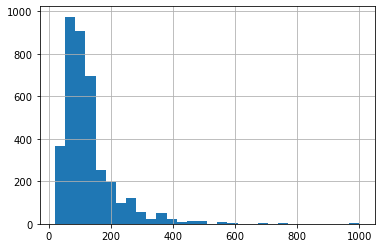

In [175]:
listings_new['price'].hist(bins=30)

Most of the times the price ranges < 400 

In [176]:
# hanle null review scores

listings_new['review_scores_value'] = listings_new['review_scores_value'].fillna(listings_new['review_scores_value'].mean()) 

In [177]:
listings_nh_grp = listings_new.groupby(listings_new['neighbourhood_group_cleansed']).mean().reset_index()


In [178]:
listings_nh_grp.sort_values(['price'],inplace=True,ascending=False)
listings_nh_grp.head()


,neighbourhood_group_cleansed,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
9,Magnolia,5.704966e+06,1.564218e+07,2.278689,4.475410,1.532787,1.770492,2.262295,177.672131,2.114754,15.295082,93.787234,9.468085,9.446809,9.829787,9.872340,9.617021,9.415269,1.754098,1.540851
12,Queen Anne,5.921983e+06,1.839227e+07,2.077966,3.423729,1.296610,1.383051,1.766102,157.223729,1.769492,22.416949,95.443089,9.807377,9.682927,9.828571,9.886179,9.751020,9.568177,1.667797,2.147460
6,Downtown,5.683918e+06,1.426956e+07,25.354167,3.566038,1.207224,1.062619,1.741509,154.405660,1.467925,23.784906,93.958333,9.567033,9.567033,9.650549,9.736842,9.769737,9.298993,3.752830,2.345764
16,West Seattle,5.752459e+06,1.660374e+07,2.167488,3.807882,1.327586,1.569307,2.009852,141.359606,1.753695,16.783251,95.864198,9.722222,9.753086,9.919753,9.901235,9.765432,9.603655,1.674877,1.860366
3,Cascade,6.089536e+06,1.703599e+07,3.483146,2.921348,1.151685,1.101124,1.415730,140.101124,1.516854,15.955056,92.461538,9.369231,9.261538,9.815385,9.815385,9.569231,9.279257,1.404494,1.805077


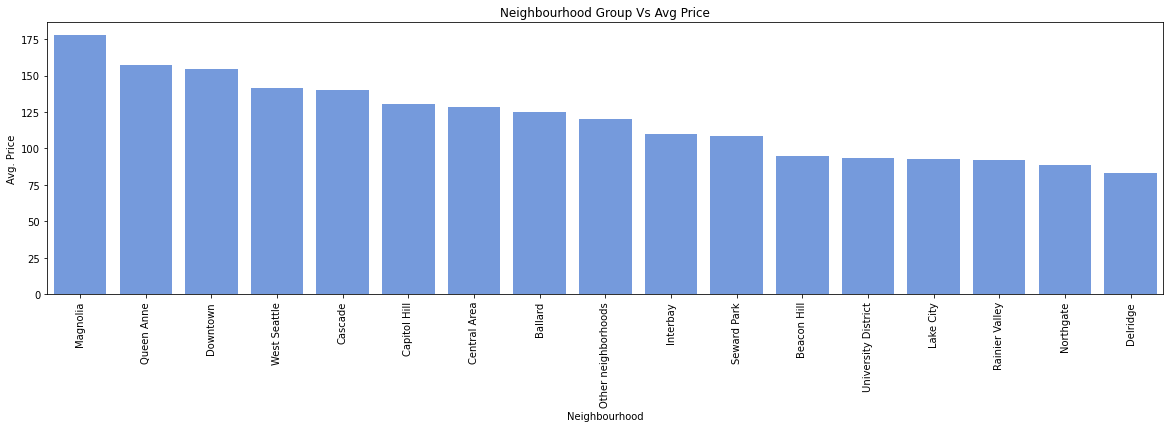

In [179]:
plt.figure(figsize=(20,5))
sb.barplot(x='neighbourhood_group_cleansed',y='price',data=listings_nh_grp,color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Avg. Price')
plt.title("Neighbourhood Group Vs Avg Price")
plt.show()

The Neighbourhood Groups 'Magnolia', 'Queen Anne' and 'Downtown' are the most costly Neighbourhood groups 

In [180]:
# analyse Neighbourhood wise data
listings_new_nh = listings_new.groupby(listings_new['neighbourhood_cleansed']).mean().reset_index()
listings_new_nh.sort_values(['price'],inplace=True,ascending=False)
listings_new_nh.head()

,neighbourhood_cleansed,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
73,Southeast Magnolia,5.410773e+06,1.397012e+07,2.000000,3.764706,1.617647,1.588235,1.823529,231.705882,2.000000,16.529412,97.214286,9.857143,9.714286,9.928571,9.928571,9.785714,9.668043,1.764706,1.712857
61,Portage Bay,5.483062e+06,1.913648e+07,1.357143,4.571429,1.750000,2.071429,2.500000,227.857143,3.285714,14.357143,94.857143,9.571429,9.642857,9.857143,9.857143,9.642857,9.571429,1.285714,1.840714
83,Westlake,6.628782e+06,2.438336e+07,1.235294,3.294118,1.470588,1.411765,1.882353,194.470588,1.647059,4.764706,96.500000,9.600000,9.200000,9.700000,9.700000,9.600000,9.421513,1.176471,1.712000
81,West Queen Anne,5.506100e+06,1.569956e+07,1.830769,3.907692,1.446154,1.569231,2.092308,187.769231,2.076923,30.461538,95.509091,9.690909,9.727273,9.690909,9.781818,9.763636,9.546499,1.692308,2.187818
48,Montlake,5.492740e+06,1.324531e+07,1.684211,4.157895,1.394737,1.789474,2.210526,182.789474,2.105263,34.736842,95.437500,9.750000,9.687500,9.812500,9.812500,9.687500,9.650355,1.526316,2.596250


In [181]:
listings_new_nh= listings_new_nh.head(30)

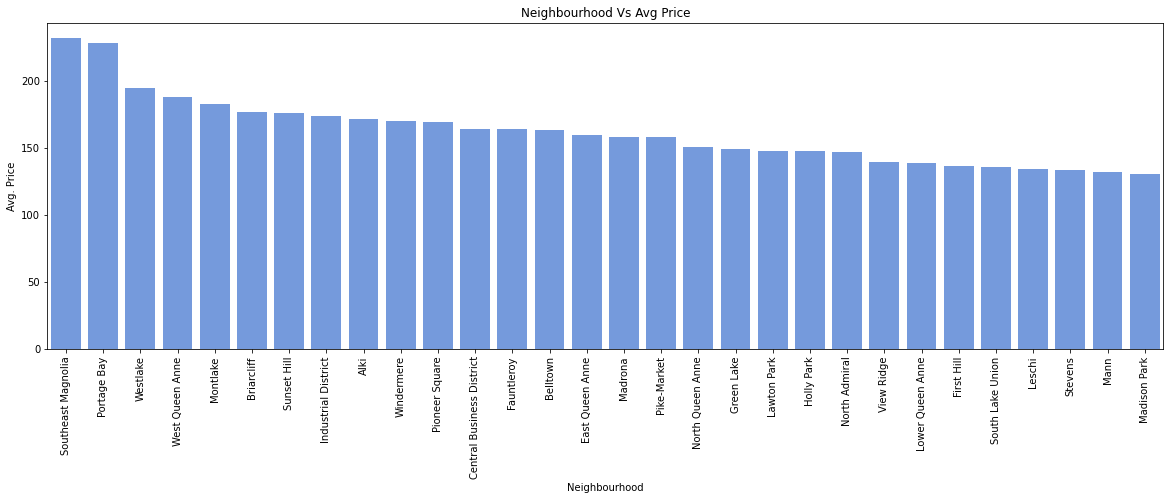

In [182]:
plt.figure(figsize=(20,6))
sb.barplot(x='neighbourhood_cleansed',y='price',data=listings_new_nh,color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Avg. Price')
plt.title("Neighbourhood Vs Avg Price")
plt.show()

Top 5 Costliest Neighbourhoods are : 
1. Southeast Magnolia 
2. Portage Bay
3. Westlake
4. West Queen Anne
5. Montlake

Text(0, 0.5, '% Listings')

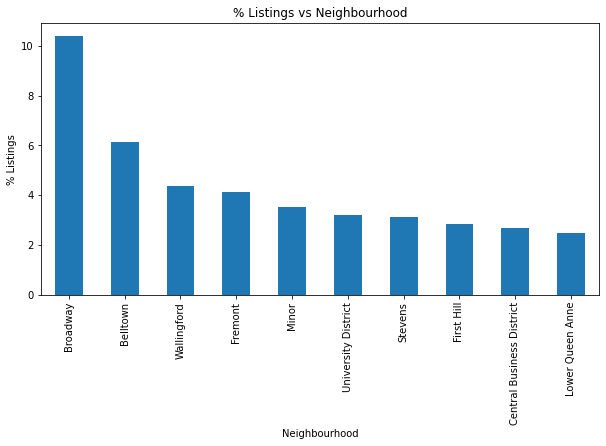

In [183]:
plt.figure(figsize=(10,5))
x = listings_new.neighbourhood_cleansed.value_counts()[:10]
y = listings_new.shape[0]
(x*100/y).plot(kind='bar',title="% Listings vs Neighbourhood")
# plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('% Listings')
# plt.show()



Top 3 Listed Neighbourhoods are
1. Broadway
2. Belltown
3. Wallingford 

Broadway is the most listed Broadway with more than 10% listings

<AxesSubplot:title={'center':'% Listings vs Room Type'}, xlabel='Neighbourhood', ylabel='room_type'>

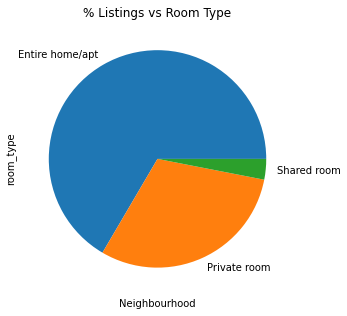

In [184]:
# Room type analysis

plt.figure(figsize=(10,5))
x = listings_new.room_type.value_counts()
y = listings_new.shape[0]
plt.xlabel('Neighbourhood')
plt.ylabel('% Listings')
(x*100/y).plot(kind='pie',title="% Listings vs Room Type")

In [185]:
listings_new_room = listings_new.groupby(listings_new['room_type']).mean().reset_index()
listings_new_room.sort_values(['price'],inplace=True,ascending=False)
listings_new_room.head()


,room_type,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Entire home/apt,5.547453e+06,1.535994e+07,8.829854,4.013774,1.306280,1.462722,2.032664,155.843369,1.908697,20.647383,94.477647,9.641981,9.587376,9.780292,9.808380,9.638077,9.424614,2.662731,1.980420
1,Private room,5.501525e+06,1.674756e+07,2.800000,2.062931,1.158283,1.000000,1.130285,75.044828,1.222414,26.612069,94.802935,9.650158,9.542105,9.820675,9.822292,9.541053,9.516355,2.447414,2.341536
2,Shared room,6.089552e+06,1.549123e+07,14.076923,1.675214,1.243590,1.000000,1.273504,47.547009,1.008547,12.940171,93.228261,9.362637,8.989130,9.582418,9.706522,9.637363,9.416738,14.051282,1.644086


Text(0.5, 1.0, 'Room Type Vs Avg Price')

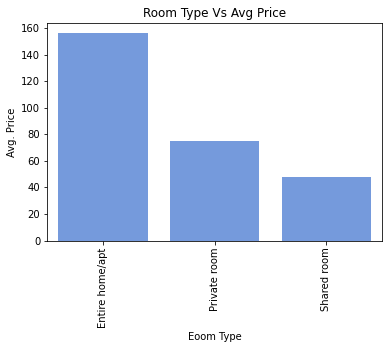

In [186]:

# plt.figure(figsize=(15,10))
sb.barplot(x='room_type',y='price',data=listings_new_room,color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Eoom Type')
plt.ylabel('Avg. Price')
plt.title("Room Type Vs Avg Price")

Here we can say that most users prefer 'entire home/apt' and not looking for share room, which shows their preference for privacy.
It is obvious that share rooms prices are the lowest and the data proves the same

## Conclusion

For all the analysis we have following findings
- Total listing available are from 65k to 90k. The availabily incrreases towards the end of the year and more listings are there for festive season like Christmas.
- The average price hike is observed in the middle of the year where we can see listings also comparatively less.
- July and August are costliest months for staying.
- Most of the times the price ranges < $400.
- The Neighbourhood Groups 'Magnolia', 'Queen Anne' and 'Downtown' are the most costly Neighbourhood groups
- Top 5 Costliest Neighbourhoods are: 
    1. Southeast Magnolia
    2. Portage Bay
    3. Westlake
    4. West Queen Anne
    5. Montlake
    

- Most users prefer 'entire home/apt' and not looking for share room, which shows their preference for privacy. It is obvious that share rooms prices are the lowest and the data proves the same